In [113]:
# Import third party libraries

# Numerical library
import numpy as np

# Used for matrix inversion
from numpy.linalg import inv

# Plotting library
import matplotlib.pyplot as plt

# Allows for printing inline for jupyter notebook
%matplotlib inline 

In [114]:
# Load datasets and store in ndarray
training_data = open('housing_train.txt','r')
X_init_train = np.loadtxt(training_data)

testing_data = open('housing_test.txt', 'r')
X_init_test = np.loadtxt(testing_data)

In [115]:
# Split off known target values
y_train = X_init_train[:,13]
y_test = X_init_test[:,13]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

In [116]:
# Remove column 13 from X
X_train = np.delete(X_init_train, 13, axis=1)
X_test = np.delete(X_init_test, 13, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(X_train)
dummy_test = make_dummy_vector(X_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, X_train), axis=1)
X_test = np.concatenate((dummy_test, X_test), axis=1)

## WE SHOULD TALK ABOUT THIS AS A GROUP
# Transpose X for further calculations
#X_train = X_train.T
#X_test = X_test.T

print X_train.shape

(433L, 14L)


In [117]:
## PART 2
# Compute optimal weight vector w -- (X^T * X)^-1 (X^T * Y)
def calc_w_vector(X, y):
    return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

def alt_calc(X,y):
    return np.dot(np.dot(inv(X), inv(X.T), np.dot(X.T,y)))
    
# Limit printout to 3 decimal places
np.set_printoptions(precision=3)

# Caculate w vectors
w_train = calc_w_vector(X_train,y_train)
w_test = calc_w_vector(X_test,y_test)

# Print both weight vectors to console
print 'w_train vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_train)))

print ' \r\nw_test vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_test)))

w_train vector:
0: [ 39.584]
1: [-0.101]
2: [ 0.046]
3: [-0.003]
4: [ 3.072]
5: [-17.225]
6: [ 3.711]
7: [ 0.007]
8: [-1.599]
9: [ 0.374]
10: [-0.016]
11: [-1.024]
12: [ 0.01]
13: [-0.586]
 
w_test vector:
0: [ 16.494]
1: [-0.03]
2: [ 0.01]
3: [-0.16]
4: [ 1.129]
5: [-6.583]
6: [ 4.438]
7: [-0.077]
8: [-0.845]
9: [-0.025]
10: [ 0.005]
11: [-0.7]
12: [ 0.01]
13: [-0.037]


In [118]:
## PART 3
# Functions
def calc_sse(X, y, w):
    return np.dot(np.subtract(y, np.dot(X, w)).T, np.subtract(y,np.dot(X, w)))

# Apply learned weight vectors
target_func_train = np.dot(X_train, w_train)
target_func_test = np.dot(X_test, w_test)

# Print error output, not sure about the 0 values

print 'Training Model: \r\nSSE: %.2f \r\n' % calc_sse(X_train, y_train, w_train)

print 'Testing Model: \r\nSSE: %.2f' % calc_sse(X_test, y_test, w_test)

Training Model: 
SSE: 9561.19 

Testing Model: 
SSE: 852.51


In [119]:
## PART 4
# Repeating part 2 and 3 without a dummy features of 1's in X

# Remove dummy column from both tables
X_train_no_dummy = X_train[:, (1,2,3,4,5,6,7,8,9,10,11,12,13)]
X_test_no_dummy = X_test[:, (1,2,3,4,5,6,7,8,9,10,11,12,13)]

# Caculate w vectors
w_train_no_dummy = calc_w_vector(X_train_no_dummy,y_train)
w_test_no_dummy = calc_w_vector(X_test_no_dummy,y_test)

# Print both weight vectors to console
print 'w_train_no_dummy vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_train_no_dummy)))

print ' \r\nw_test_no_dummy vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_test_no_dummy)))

w_train_no_dummy vector:
0: [-0.098]
1: [ 0.049]
2: [-0.025]
3: [ 3.451]
4: [-0.355]
5: [ 5.817]
6: [-0.003]
7: [-1.021]
8: [ 0.227]
9: [-0.012]
10: [-0.388]
11: [ 0.017]
12: [-0.485]
 
w_test_no_dummy vector:
0: [ 0.011]
1: [ 0.01]
2: [-0.19]
3: [ 1.126]
4: [-1.137]
5: [ 5.801]
6: [-0.081]
7: [-0.649]
8: [-0.129]
9: [ 0.008]
10: [-0.572]
11: [ 0.011]
12: [ 0.072]


<h3>Thoughts about results</h3>
The above results make it seems like our model will be centered around the orgin beacuse we did not calcuate a true b value in the w vector.

In [120]:
## PART 4 cont.
# Apply learned weight vectors
target_func_train_no_dummy = np.dot(X_train_no_dummy, w_train_no_dummy)
target_func_test_no_dummy = np.dot(X_test_no_dummy, w_test_no_dummy)

# Print error output, not sure about the 0 values
print 'Training Model without Dummy: \r\nSSE: %.2f \r\n' % calc_sse(X_train_no_dummy, y_train, w_train_no_dummy)

print 'Testing Model without dummy: \r\nSSE: %.2f' % calc_sse(X_test_no_dummy, y_test, w_test_no_dummy)

Training Model without Dummy: 
SSE: 10598.06 

Testing Model without dummy: 
SSE: 883.85


In [121]:
# Generate uniform additional uniformly distributed features
feature_one = np.random.uniform(0,10,433)
feature_two = np.random.uniform(0,100,433)
feature_three = np.random.uniform(0,200,433)
feature_four = np.random.uniform(0,400,433)
feature_five = np.random.uniform(0,600,433)
feature_six = np.random.uniform(0,800,433)
feature_seven = np.random.uniform(0,1000,433)
feature_eight = np.random.uniform(0,1200,433)
feature_nine = np.random.uniform(0,1400,433)
feature_ten = np.random.uniform(0,1600,433)

In [122]:
# Set up cases for 2,4,6,8,10 additional uniformly distributed features
#two_feat = X_train[:, ()]

In [136]:
# Part 6 cont
# Split off known target values
y_train = X_init_train[:,13]
y_test = X_init_test[:,13]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 13 from X
X_train = np.delete(X_init_train, 13, axis=1)
X_test = np.delete(X_init_test, 13, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(X_train)
dummy_test = make_dummy_vector(X_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, X_train), axis=1)
X_test = np.concatenate((dummy_test, X_test), axis=1)

# Compute optimal weight vector w -- (X^T * X + lamda * I)^-1 (X^T * Y)
def calc_w_vector(X, y, lamda):
    I = np.identity(len(np.dot(X.T,X)))
    return np.dot(inv(np.dot(X.T,X) + lamda * I), np.dot(X.T,y))

def alt_calc(X,y):
    return np.dot(np.dot(inv(X), inv(X.T), np.dot(X.T,y)))
    
# Limit printout to 3 decimal places
np.set_printoptions(precision=3)
w_train_results, w_test_results = {}, {}
lamdas = [value * 0.01 for value in range(501)]
# print lamdas
# Caculate w vectors
for lamda in lamdas:
    w_train_results.setdefault(lamda, [])
    w_train = calc_w_vector(X_train,y_train, lamda)
    w_train_results[lamda] = w_train
    
    w_test_results.setdefault(lamda, [])
    w_test = calc_w_vector(X_test,y_test, lamda)
    w_test_results[lamda] = w_test

sse_train, sse_test = {}, {}
# Print error output, not sure about the 0 values
print 'Training Model:'
for key in w_train_results:
    w_train = w_train_results[key]
    target_func_train = np.dot(X_train, w_train)
    sse = calc_sse(X_train, y_train, w_train)
    sse_train.setdefault(key, sse[0][0])
    print '[%0.2f]-SSE: %.2f \r\n' % (key, sse)

print 'Testing Model:'
for key in w_test_results:
    w_test = w_test_results[key]
    target_func_test = np.dot(X_test, w_test)
    sse = calc_sse(X_test, y_test, w_test)
    sse_test.setdefault(key, sse[0][0])
    print '[%0.2f]-SSE: %.2f \r\n' % (key, sse)

Training Model:
[0.00]-SSE: 9561.19 

[0.25]-SSE: 9661.12 

[2.00]-SSE: 10174.59 

[3.00]-SSE: 10275.63 

[4.00]-SSE: 10338.01 

[5.00]-SSE: 10381.24 

[0.50]-SSE: 9790.23 

[1.00]-SSE: 9977.30 

[0.41]-SSE: 9746.10 

[0.75]-SSE: 9895.13 

[1.17]-SSE: 10023.13 

[0.23]-SSE: 9650.30 

[3.29]-SSE: 10296.49 

[0.58]-SSE: 9826.59 

[3.67]-SSE: 10320.15 

[2.91]-SSE: 10268.57 

[3.50]-SSE: 10310.03 

[1.34]-SSE: 10062.59 

[3.59]-SSE: 10315.47 

[1.89]-SSE: 10159.38 

[2.25]-SSE: 10205.45 

[0.60]-SSE: 9835.26 

[4.12]-SSE: 10343.98 

[0.96]-SSE: 9965.44 

[0.91]-SSE: 9949.97 

[2.52]-SSE: 10234.01 

[0.70]-SSE: 9876.15 

[3.53]-SSE: 10311.86 

[3.85]-SSE: 10330.17 

[0.78]-SSE: 9906.07 

[3.45]-SSE: 10306.91 

[1.67]-SSE: 10125.31 

[1.43]-SSE: 10081.33 

[4.06]-SSE: 10341.03 

[3.62]-SSE: 10317.25 

[3.15]-SSE: 10286.76 

[3.07]-SSE: 10280.92 

[3.54]-SSE: 10312.47 

[2.36]-SSE: 10217.61 

[3.46]-SSE: 10307.54 

[0.37]-SSE: 9725.48 

[1.20]-SSE: 10030.51 

[3.92]-SSE: 10333.88 

[0.40]-SS

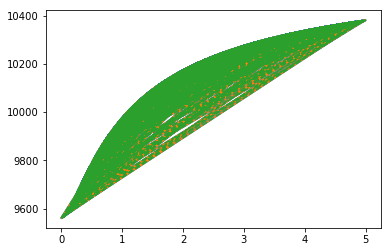

In [142]:
## part 6 plot
x = sse_train.keys()
y = sse_train.values()
plt.plot(x, y, linewidth=2.0)
plt.plot(x, y, ls='solid')
plt.plot(x, y, ls='--')

x = sse_test.keys()
y = sse_test.values()
plt.plot(x, y, linewidth=2.0)
plt.plot(x, y, ls='solid')
plt.plot(x, y, ls='--')

In [ ]:
## Extra stuff below ##

In [ ]:
print X_train.shape
print w_train.shape

In [ ]:
print X_train.T

In [ ]:
# Don't show scientific notation
np.set_printoptions(suppress=True)

print "Printing X_train:"
print X_train

In [ ]:
print "Printing y_train:"
print y_train

In [ ]:
# Plot feature 1: Crime rate by town
plt.scatter(X_train[:, 0],y_train)

In [ ]:
# Plot feature 2: Residential land zoned for lots over 25,0000 sq. ft
plt.scatter(X_train[:, 1],y_train)

In [ ]:
# Multiplotting feature 1 & 2
plt.scatter(X_train[:, 0],y_train)
plt.scatter(X_train[:, 1],y_train)

In [ ]:
# Plot feature 3: Proportion of non-retail business acres per town
plt.scatter(X_train[:, 2],y_train)

In [ ]:
# Plot feature 4: Charles River dummy variable (= 1 if tract bounds river, 0 otherwise)
plt.scatter(X_train[:, 3],y_train)

In [ ]:
# Plot feature 5: Nitric oxides concentration (parts per 10 million)
plt.scatter(X_train[:, 4],y_train)

In [ ]:
# Plot feature 6: Average number fo rooms per dwelling
plt.scatter(X_train[:, 5],y_train)

In [ ]:
# Plot feature 7: Porportion of owner-occupied units built prior to 1940
plt.scatter(X_train[:, 6],y_train)

In [ ]:
# Plot feature 8: Weighted distances to five Boston employment centers
plt.scatter(X_train[:, 7],y_train)

In [ ]:
# Plot feature 9: Index of accessability to radial highways
plt.scatter(X_train[:, 8],y_train)

In [ ]:
# Plot feature 10: Full-value property-tax rate per $10,000
plt.scatter(X_train[:, 9],y_train)

In [ ]:
# Plot feature 11: Pupil-teacher ratio by town
plt.scatter(X_train[:, 10],y_train)

In [ ]:
# Plot feature 12: 1000(Bk - 0.63)^2 where Bk is the population fo blacks by town
plt.scatter(X_train[:, 11],y_train)

In [ ]:
# Plot feature 13: % lower status of the population
plt.scatter(X_train[:, 12],y_train)